# Import Library


In [ ]:
dataset_d04_mini_p

c:\Users\isxzl\anaconda3\envs\SkyShrink\lib\site-packages\lightning_fabric\loggers\csv_logs.py:268: Experiment logs directory C:/Datasets/Compression/Neural_Networks\ exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
c:\Users\isxzl\anaconda3\envs\SkyShrink\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Datasets\Compression\Neural_Networks exists and is not empty.


Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

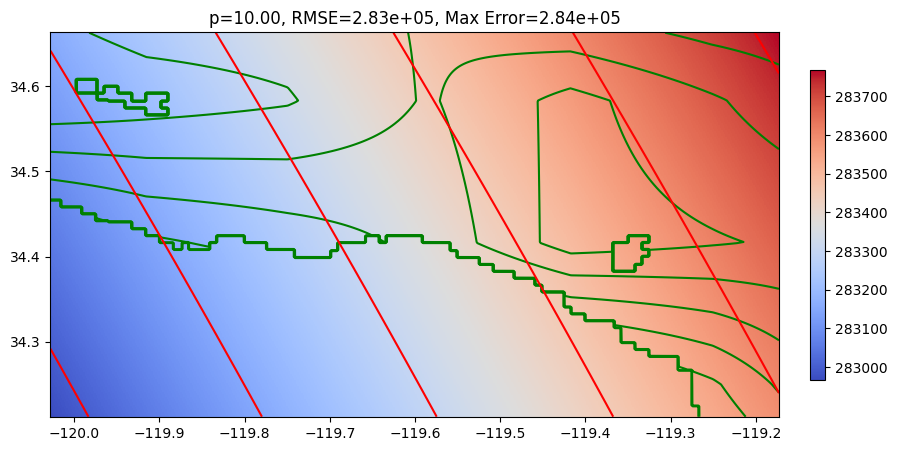

Epoch 4: 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]                     

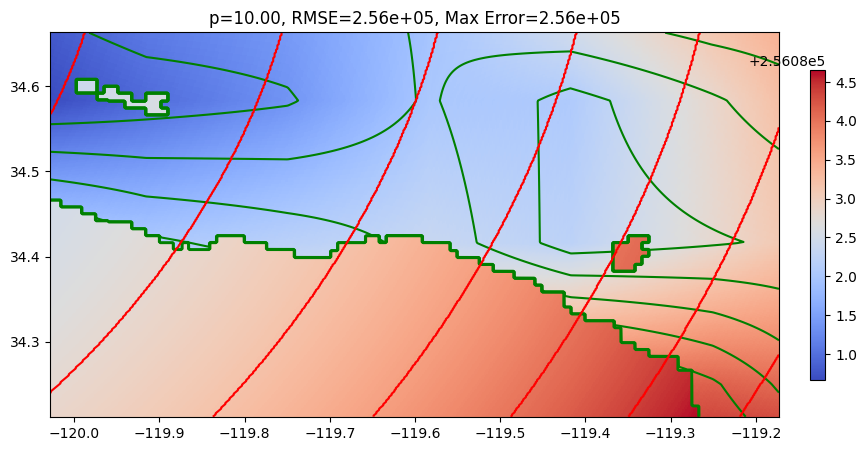

Epoch 9: 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

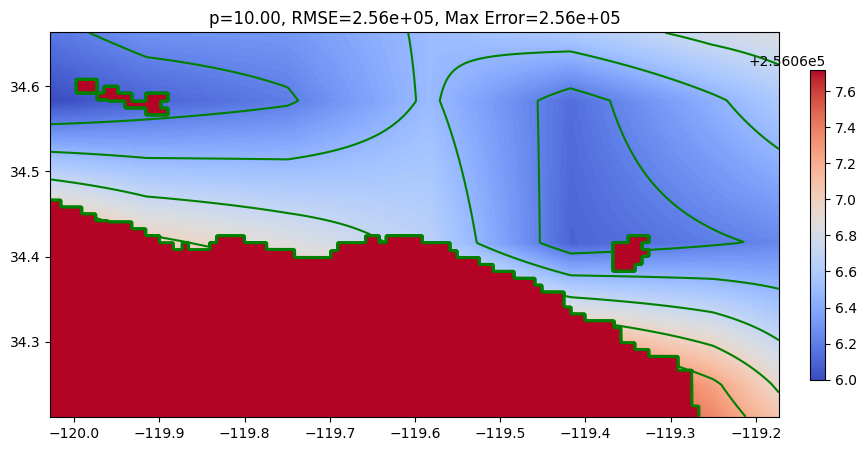

Epoch 14: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

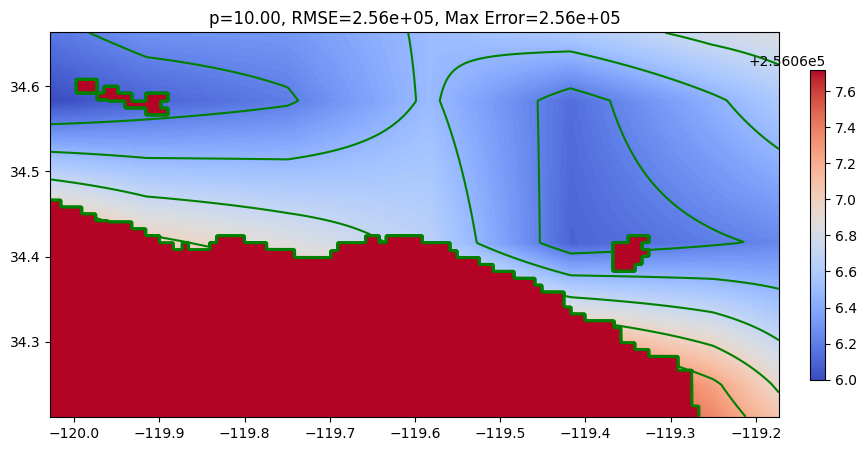

Epoch 19: 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

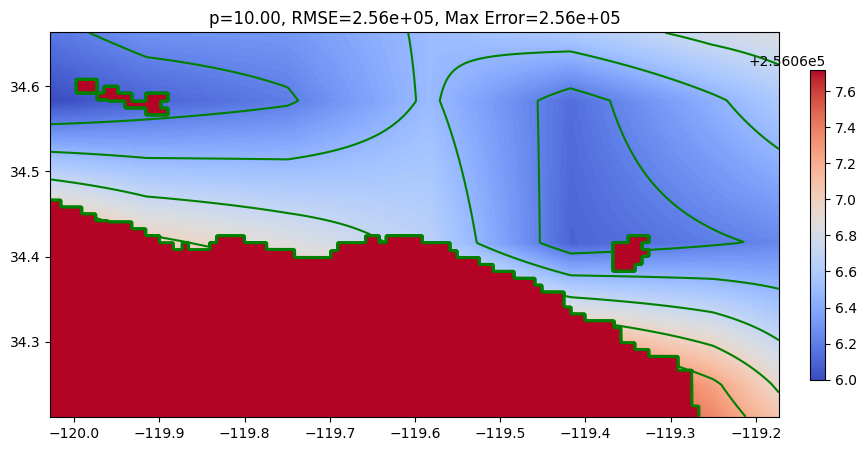

Epoch 20:  33%|███▎      | 2/6 [00:00<00:00,  4.72it/s]

In [1]:
from skyshrink.compressor import NNCompression
flag=2# True
if flag==1:
    variable="z"
    file_name="dataset1_mini.nc"
elif flag==2:
    variable="LAI"
    file_name="dataset_d04_mini_p.nc"
else:
    variable="z"
    file_name="dataset1_mini_p.nc"
NNCompression(
    nepoches=35,
    all=True,
    quantizing=True,
    testing=True,
    variable=variable,
    dataloader_mode="sampling_nc",
    data_path="C:\Datasets\Compression\Source_Data",
    file_name=file_name,
    width=32,  # Assuming a default value for $W
    depth=3,
    output_path="C:\Datasets\Compression\Source_Data\Output",
    output_file="dataset1_mini_w32.nc",  # Assuming a default value for $W
    num_workers=0,
    workspace_path="C:/Datasets/Compression/Neural_Networks",
    #ckpt_path=r"C:\Datasets\Compression\Neural_Networks\lightning_logs\version_4\checkpoints\epoch=1-step=6024.ckpt",
    #notraining=False,
    batch_size=4,
    nbatch=24, 
    nsample=361*120, 
    check_val_every_n_epoch=5,
)           


In [1]:
import sys
sys.path.append("C:/Users/isxzl/OneDrive/Code/SkyShrink")
import os 
from skyshrink.packarray import Packarray
from skyshrink.compressor import FPZip
from numcodecs import LZ4,Blosc,ZFPY,Zlib
from skyshrink.evaluation import compare_accuracy,compare_meta,visualize_spatial_accuracy,compare_attribute,plot_compression_ratios
from importlib.metadata import PackageNotFoundError, version
tuple(map(int, version("zfpy").split(".")))
import xarray as xr
import os

environment="windows" #Windows or Linux
if environment=="windows":
    file_name="dataset_d04_mini.nc" #"dataset1_mini.nc"# 
    save_dir="C:/Datasets/Compression/Output"
    file_dir="C:/Datasets/Compression/Source_Data"
elif environment=="linux":
    file_name="d04_batch.nc"
    save_dir="/afs/crc.nd.edu/user/z/zliang7/Dataset/"
    file_dir="/afs/crc.nd.edu/user/z/zliang7/Dataset/Output"
zip_dir=save_dir
original_path = os.path.join(file_dir, file_name)
# ds = xr.open_dataset(original_path)
# ds2 = xr.open_dataset(os.path.join(file_dir, "dataset1_mini.nc"))
#ds = adjust_coordinate_order(ds["T2"])
from skyshrink.compressor import NNCompressor
pds1=Packarray(original_path=original_path,root_dir=save_dir)
pds1.compress(NNCompressor(nepoches=1,nsample=8,nbatch=8))
pds1.decompress()

[Skyshrink:NNCompressor] Start Overwrite to ...ressor\dataset_d04_mini_zipped
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]                     
Model size (MB): 0.08653640747070312
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]                     
Model size (MB): 0.08653640747070312
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]                     
Model size (MB): 0.08653640747070312
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]                     
Model size (MB): 0.08653640747070312
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]                     
Model size (MB): 0.08653640747070312
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]                     
Model size (MB): 0.08653640747070312
Epoch 0: 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]                     
Model size (MB): 0.08653640747070312
[Skyshrink:NNCompressor] Unzipping overwrite to ...r\dataset_d04_mini_unzipped.nc


 14%|█▍        | 3/21 [00:01<00:06,  2.66it/s]

# Initialization with Dataset and Methods

In [11]:
import os

environment="windows" #Windows or Linux
if environment=="windows":
    file_name="dataset_d04_mini.nc" #"dataset1_mini.nc"# 
    save_dir="C:/Datasets/Compression/Output"
    file_dir="C:/Datasets/Compression/Source_Data"
elif environment=="linux":
    file_name="d04_batch.nc"
    save_dir="/afs/crc.nd.edu/user/z/zliang7/Dataset/"
    file_dir="/afs/crc.nd.edu/user/z/zliang7/Dataset/Output"
zip_dir=save_dir
original_path=os.path.join(file_dir,file_name)
#ds=xr.open_dataset(original_path)
# log_path=r"C:\Datasets\Compression\Output\Zlib\dataset_d04_mini_log.yaml"
# pds1=Packarray(original_path=original_path,root_dir=save_dir,workspace_name="Zlib",log_path=log_path)
# import os
 
ds2=xr.open_dataset("C:/Datasets/Compression/Output/NNCompressor/dataset_d04_mini_unzipped.nc")
# ds2.T2.isel(level=1, time=1).plot()
#ds.T2.isel(time=1).plot()
from skyshrink.utils import remove_pressure_coord


<xarray.Dataset> Size: 103MB
Dimensions:    (time: 21, latitude: 335, longitude: 525)
Coordinates:
  * time       (time) datetime64[ns] 168B 2022-04-03T18:00:00 ... 2022-04-03T...
  * latitude   (latitude) float32 1kB 34.21 34.21 34.21 ... 34.66 34.66 34.66
  * longitude  (longitude) float32 2kB -120.0 -120.0 -120.0 ... -119.2 -119.2
Data variables:
    T2         (time, latitude, longitude) float32 15MB ...
    U10        (time, latitude, longitude) float32 15MB ...
    V10        (time, latitude, longitude) float32 15MB ...
    PSFC       (time, latitude, longitude) float32 15MB ...
    LAI        (time, latitude, longitude) float32 15MB ...
    ALBEDO     (time, latitude, longitude) float32 15MB ...
    RAINC      (time, latitude, longitude) float32 15MB ...
Attributes: (12/134)
    TITLE:                            OUTPUT FROM WRF V4.4.1 MODEL
    START_DATE:                      2022-04-03_18:00:00
    SIMULATION_START_DATE:           2022-04-03_18:00:00
    WEST-EAST_GRID_DIMENSION:        526
    SOUTH-NORTH_GRID_DIMENSION:      336
    BOTTOM-TOP_GRID_DIMENSION:       91
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [ ]:
# pds6=Packarray(original_path=original_path)
# pds6.compress({"HGT": {'compressor': ZFPY(mode=4,tolerance=0.001)},
#                "U10":{'compressor': Blosc(precision=20)},
#                "V10":{'compressor': LZ4()}})
# pds6.decompress()

pds1=Packarray(original_path=original_path)
pds1.compress(Zlib())
pds1.decompress()

pds2=Packarray(original_path=original_path)
pds2.compress(LZ4())
pds2.decompress()

pds3=Packarray(original_path=original_path)
pds3.compress(Blosc(cname='zlib')) #, clevel=9
pds3.decompress()

# pds4=Packarray(workspace_name="FPZip",original_path=original_path)
# pds4.compress(FPZip(precision=10))
# pds4.decompress() 

pds5=Packarray(workspace_name="ZFPY_12",original_path=original_path)
pds5.compress(ZFPY(mode=3,precision=12))
pds5.decompress()

pds6=Packarray(workspace_name="ZFPY_24",original_path=original_path)
pds6.compress(ZFPY(mode=3,precision=24))
pds6.decompress()

pds8=Packarray(workspace_name="FPZip_12",original_path=original_path)
pds8.compress(FPZip(precision=12))
pds8.decompress()

pds9=Packarray(workspace_name="FPZip_24",original_path=original_path)
pds9.compress(FPZip(precision=24))
pds9.decompress()



# Analysis

## 1. Comparision of Accuracy

In [ ]:
df=compare_accuracy([pds1]).groupby(['var','workspace_name']).sum()


## 2. Comparision of Efficiency

In [ ]:
df=compare_meta([pds1, pds2,pds3,pds6,pds9]).groupby(['var','method']).sum()
df.to_csv(save_dir+"Eff.csv")
df

## 3. Robustness under Parameters

In [ ]:
from tqdm import tqdm
import zfpy

pds_list=[]
for level in tqdm(range(10,25)):
    pds=Packarray(workspace_name="FPZip_"+str(level),original_path=original_path,verbose=0)
    pds.compress(FPZip(precision=level))
    pds.decompress() 
    pds_list.append(pds)
    pds=Packarray(workspace_name="ZFPY"+str(level),original_path=original_path,verbose=0)
    pds.compress(ZFPY(mode=zfpy.mode_fixed_precision,precision=level))
    pds.decompress()
    pds_list.append(pds)

In [ ]:
# Example usage:
df=compare_attribute(pds_list,attr_list=["method","precision","compression_ratio","encoding_speed"],glob=False)
method_list = ["fpzip", "zfpy"]
var_list = ["U10", "V10"]
x = "compression_ratio"
y = "encoding (MB/s)"
level="precision"
plot_compression_ratios(df, method_list, var_list, x, y,level) #,x_lim=[0.95,0.7]

In [ ]:
# Example usage:
df=compare_attribute(pds_list,attr_list=["method","precision","compression_ratio","encoding_speed","decoding_speed"],glob=False)
method_list = ["fpzip", "zfpy"]
var_list = ["U10", "V10"]
x = "compression_ratio"
y = "decoding (MB/s)"
level="precision"
plot_compression_ratios(df, method_list, var_list, x, y,level) #,x_lim=[0.95,0.7]

### Legacy

In [ ]:
# from tqdm import tqdm
# pds_list=[]
# for level in tqdm(range(1,10)):
#     pds1=Packarray(workspace_name="Zlib_"+str(level),original_path=original_path,verbose=0)
#     pds1.compress(Zlib(level=level))
#     pds1.decompress()
#     pds_list.append(pds1)
#     pds3=Packarray(workspace_name="Blosc_"+str(level),original_path=original_path,verbose=0)
#     pds3.compress(Blosc(cname='zstd', clevel=level))
#     pds3.decompress()
#     pds_list.append(pds3)

# df=compare_attribute(pds_list,attr_list=["method","level","compression_ratio","encoding_speed"],glob=False)
# # Example usage:
# method_list = ["zlib", "blosc"]
# var_list = ["U10", "V10"]
# x = "compression_ratio"
# y = "encoding (MB/s)"
# level="level"
# plot_compression_ratios(df, method_list, var_list, x, y,level,x_lim=[0.95,0.7])


## 3. Accuracy Distribution over Space

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

def visualize_spatial_accuracy(pds_list, var_list=None, font_size=15):
    # Calculate spatial accuracy metrics for each pds
    plt.rcParams.update({'font.size': font_size})  # Adjust global font size as needed

    metrics_list = [spatial_accuracy_map(pds) for pds in pds_list]
    
    # Determine variables to plot
    var_list = var_list or list(metrics_list[0].keys())
    
    for var in var_list:
        num_metrics = len(metrics_list[0][var].data_vars)
        num_pds = len(pds_list)
        
        # Set up the GridSpec layout
        fig = plt.figure(figsize=(5 * num_metrics, 4 * num_pds))
        gs = gridspec.GridSpec(num_pds, num_metrics, figure=fig)
        
        for row_idx, (pds, metrics) in tqdm(enumerate(zip(pds_list, metrics_list))):
            if (metric_ds := metrics.get(var)):
                # Create the first subplot in the row to establish a shared y-axis
                axes = [fig.add_subplot(gs[row_idx, 0])]
                
                # Set initial titles and labels
                if row_idx == 0:
                    axes[0].text(-0.1, 1.05, 'XLAT', transform=axes[0].transAxes, fontsize=font_size,
                                 verticalalignment='top', horizontalalignment='center', rotation=0)
                
                # Create other subplots, sharing y-axis with the first in the row
                for i in range(1, num_metrics):
                    ax = fig.add_subplot(gs[row_idx, i], sharey=axes[0])
                    axes.append(ax)
                
                # Plot each metric
                for i, (ax, metric_name) in enumerate(zip(axes, metric_ds.data_vars)):
                    metric = metric_ds[metric_name]
                    aggregated_value = metric.mean().item()
                    std_value = metric.std().item()
                    im = metric.plot(ax=ax, cmap='jet', robust=True, add_colorbar=True)

                    # Format colorbar using ScalarFormatter
                    if im.colorbar:
                        im.colorbar.formatter = ScalarFormatter(useMathText=True)
                        im.colorbar.formatter.set_powerlimits((0, 2))
                        im.colorbar.update_ticks()
                        im.colorbar.set_label('')
                    
                    # Set titles and labels with appropriate font sizes
                    ax.set_title(f'{metric_name}' if row_idx == 0 else '', fontsize=font_size)
                    ax.set_xlabel('XLONG' if row_idx == num_pds - 1 else '', fontsize=font_size)
                    ax.xaxis.set_tick_params(labelbottom=(row_idx == num_pds - 1))
                    ax.set_ylabel(pds.workspace_name if i == 0 else '', fontsize=font_size)
                    ax.yaxis.set_tick_params(labelleft=(i == 0))
                    
                    # Annotation for average and standard deviation
                    ax.text(0.97, 0.12, f'aver.: {aggregated_value:.2e}', horizontalalignment='right',
                            verticalalignment='center', transform=ax.transAxes,
                            fontsize=font_size-3, color='white', bbox=dict(facecolor='black', alpha=0.6))
                    ax.text(0.97, 0.05, f'std: {std_value:.2e}', horizontalalignment='right',
                            verticalalignment='center', transform=ax.transAxes,
                            fontsize=font_size-3, color='white', bbox=dict(facecolor='black', alpha=0.6))
        
        # Adjust layout and display the plot
        plt.tight_layout(pad=-0.0)
        plt.show()
        
visualize_spatial_accuracy([pds6, pds9], ["T2","U10","PSFC","LAI","ALBEDO"],font_size=18)

## 3. Accuracy Distribution over Time

In [ ]:
from tqdm import tqdm
import zfpy
from skyshrink.evaluation import time_series_accuracy,visualize_time_series

pds_list=[]
for level in tqdm([8,16,24]):
    pds=Packarray(workspace_name="ZFPY"+str(level),original_path=original_path,verbose=0)
    pds.compress(ZFPY(mode=3,precision=level))
    pds.decompress()
    pds_list.append(pds)
    
    pds=Packarray(workspace_name="FPZip"+str(level),original_path=original_path,verbose=0)
    pds.compress(FPZip(precision=level))
    pds.decompress()
    pds_list.append(pds)


In [ ]:

import pandas as pd
from tqdm import tqdm
import numpy as np
def time_series_accuracy(pds_list, legend_str):
    # Get the variable list from the first element in the list
    var_list = pds_list[0].glob["var_list"]
    global_df = pd.DataFrame()  # Initialize a global DataFrame to concatenate results
    ds_org=pds_list[0].xarray
    
    for pds in tqdm(pds_list):
        pds.sanity_check()  # Ensure data integrity
        ds = pds.xarray_encoded
        for var in var_list:
            ds_var = ds[var]
            legend_value = getattr(pds, var)[legend_str]
    
            # Calculate mean and standard deviation along the specified dimensions
            mean_ds = ds_var.mean(dim=["south_north", "west_east"])
            std_ds = ds_var.std(dim=["south_north", "west_east"])
            unit_df = ds_var.sel(south_north=160,west_east=160)
            mae_df = np.abs(ds_var-ds_org[var]).mean(dim=["south_north", "west_east"])
            
            # Convert to pandas DataFrame
            mean_df = mean_ds.to_dataframe(name='mean')
            std_df = std_ds.to_dataframe(name='std')
            unit_df = unit_df.to_dataframe(name='cell')  
            mae_df=mae_df.to_dataframe(name='mae')  
            
            # Concatenate mean and std DataFrames
            result_df = pd.concat([mean_df, std_df,unit_df,mae_df], axis=1)
            
            result_df['variable'] = var
            result_df[legend_str] = legend_value
            result_df['method'] = getattr(pds, var).get("method", "Unknown Method")
            # Append to global DataFrame
            global_df = pd.concat([global_df, result_df])
    return global_df
global_df = time_series_accuracy(pds_list, "precision")
global_df=global_df[global_df["variable"]!="RAINC"]
global_df=global_df[global_df["variable"]!="V10"]
global_df

In [ ]:
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

def visualize_time_series(global_df, y_str="mean", legend="tolerance", fontsize=11):
    # Update global font size
    plt.rcParams.update({'font.size': fontsize})
    
    # Group the DataFrame by the "method" column
    method_groups = global_df.groupby("method")
    num_methods = len(method_groups)
    
    # Determine the number of columns needed for the subplots
    cols = len(global_df.variable.unique())
    
    # Calculate total number of rows based on the number of methods (each method will have its own row)
    total_rows = num_methods

    # Create a figure with GridSpec
    fig = plt.figure(figsize=(cols * 3, 3 * total_rows))
    gs = gridspec.GridSpec(total_rows, cols, figure=fig)
    
    ax_list = []  # To keep track of axes for shared axes setting
    
    # Iterate over each method group and plot in separate rows
    for method_idx, (method_name, df_method) in enumerate(method_groups):
        var_list = df_method["variable"].unique()
        num_vars = len(var_list)
        
        # Iterate over each variable in the method
        for var_idx, var in enumerate(var_list):
            df_var = df_method[df_method["variable"] == var]
            
            # Determine the row (method index) and column (variable index within the method)
            row_idx = method_idx  # Each method gets a dedicated row
            col_idx = var_idx  # Each variable gets a dedicated column
            
            # Define the position of the subplot in the grid, sharing x and y axes
            sharex = ax_list[0] if ax_list else None  # Share x-axis with the first subplot
            #sharey = ax_list[0] if ax_list else None  # Share y-axis with the first subplot
            ax = fig.add_subplot(gs[row_idx, col_idx], sharex=sharex)
            ax_list.append(ax)
            
            for legend_val in df_var[legend].unique():
                df_legend = df_var[df_var[legend] == legend_val]
                df_legend = df_legend.sort_index()  # Ensure the time series is sorted by the index
                
                ax.plot(df_legend.index, df_legend[y_str], label=f'{legend}: {legend_val}') 
            
            # Only show titles for the first row (or first method)
            if row_idx == 0:
                ax.set_title(f'{var}')
                
            # Only show y-axis labels and ticks for the first column
            # if col_idx == 0:
            #     ax.set_ylabel(f'{method_name}')
            # else:
            #     plt.setp(ax.get_yticklabels(), visible=False)

            ax.set_yscale('log')  # Set y-axis to logarithmic scale
            if row_idx==0 and col_idx==0:
                ax.legend()

            # Only show x-axis labels and ticks for the last row
            if row_idx != total_rows - 1:
                plt.setp(ax.get_xticklabels(), visible=False)
            else:
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

    # Remove empty subplots if any
    for i in range(len(ax_list), total_rows * cols):
        fig.delaxes(fig.axes[i])

    # Adaptive adjustment of time labels
    fig.autofmt_xdate(rotation=45)
    
    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()

# Example usage
visualize_time_series(global_df, y_str="mae", legend="precision")


In [ ]:
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
def visualize_time_series(global_df, y_str="mean", legend="tolerance", fontsize=15):
    # Update global font size
    plt.rcParams.update({'font.size': fontsize})
    
    # Extract unique variables from the DataFrame
    var_list = global_df["variable"].unique()
    num_vars = len(var_list)
    
    # Determine the number of rows and columns needed for the subplots
    cols = 3
    rows = math.ceil(num_vars / cols)
    
    # Create a grid for the subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4.5 * rows), squeeze=False)
    
    for idx, var in enumerate(var_list):
        df_var = global_df[global_df["variable"] == var]
        
        # Plotting in the appropriate subplot
        ax = axes[idx // cols, idx % cols]
        for legend_val in df_var[legend].unique():
            df_legend = df_var[df_var[legend] == legend_val]
            df_legend = df_legend.sort_index()  # Ensure the time series is sorted by the index
            ax.plot(df_legend.index, df_legend[y_str], label=f'{legend}: {legend_val}')
        
        ax.set_title(f'{var}')
        ax.set_xlabel('Time')
        ax.set_ylabel(y_str)
        #ax.set_yscale('log')  # Set y-axis to logarithmic scale
        #ax.legend()
        
        # Adaptive adjustment of time labels
        fig.autofmt_xdate(rotation=45)
        # Set x-axis to display dates in a monthly format
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        
    # Remove empty subplots
    for i in range(num_vars, rows * cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()
    
    
visualize_time_series(global_df[global_df["precision"]==8], y_str="mean", legend="precision")